importing lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout


In [2]:
data = pd.read_csv('stock.csv')

In [3]:
print(data.head())

         Date   Open   High    Low  Close  Volume  Stock Trading
0  2016-12-30  42120  42330  41700  41830  610000    25628028000
1  2016-12-29  43000  43220  42540  42660  448400    19188227000
2  2016-12-28  43940  43970  43270  43270  339900    14780670000
3  2016-12-27  43140  43700  43140  43620  400100    17427993000
4  2016-12-26  43310  43660  43090  43340  358200    15547803000


In [4]:
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)


In [5]:
closing_prices = data['Close'].values.reshape(-1, 1)

In [6]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)


In [9]:

# Function to create sequences for LSTM
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)


In [12]:
# Define the number of time steps
time_steps = 60



In [19]:
# Define the number of time steps
time_steps = 60

# Calculate the split point for training/testing data
train_size = int(len(scaled_data) * 0.8)  # 80% for training

# Split the data into training and testing sets
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

In [20]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [23]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0028 - val_loss: 7.6320e-04
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss:

In [24]:
# Predict on test data
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [25]:

# Rescale actual test prices
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


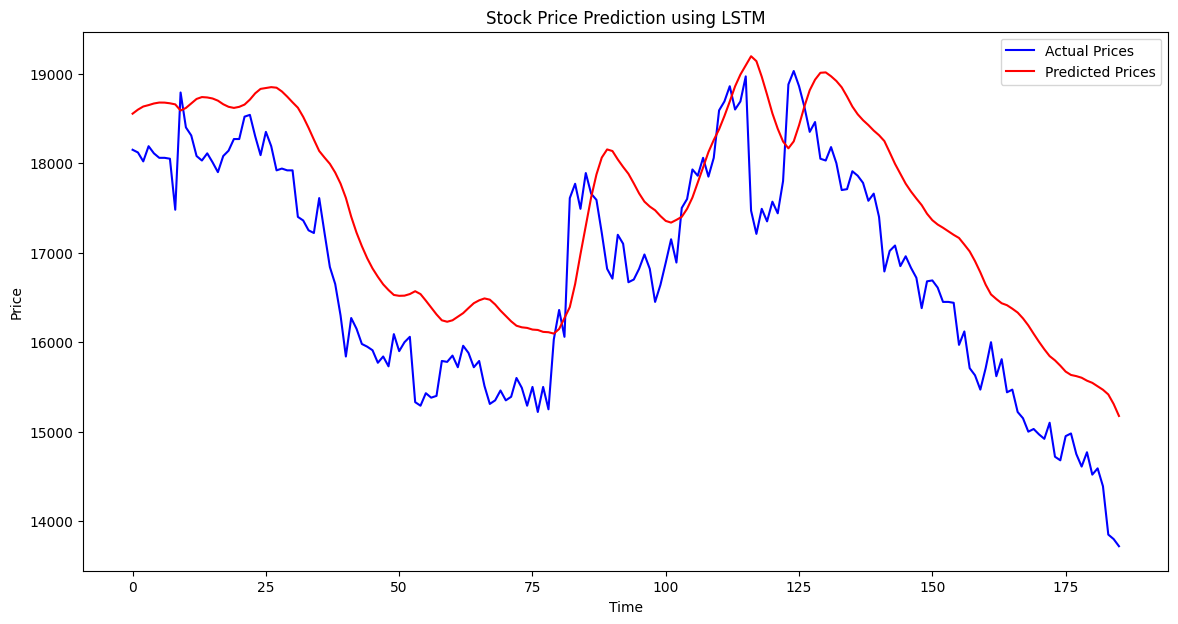

In [26]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()